In [133]:
# Data Management
import pandas as pd
import numpy as np

# Reporting
import matplotlib.pyplot as plt

# Formatting
import json
import requests
import datetime

# SentiCrypt Data Stream

In [113]:
# https://senticrypt.com/docs.html
# API Request
start_date = datetime.datetime(2020, 6, 1, 0)
end_date = datetime.datetime(2020, 12, 1, 23)
delta = datetime.timedelta(hours=1)
dates = []
means = []
counts = []
while start_date <= end_date:
    format_date = str(start_date.strftime('%Y-%m-%d'))
    url = 'http://api.senticrypt.com/v1/history/bitcoin-' + str(start_date.strftime('%Y-%m-%d_%H')) + '.json'
    req = requests.get(url)
    if req.status_code == 200:
        data = json.loads(req.text)
    else:
        dates.append(None)
        means.append(None)
        counts.append(None)
        continue
    if format_date not in dates:
        dates.append(format_date)
    means.append(data[0]['mean'])
    counts.append(data[0]['count'])
    start_date += delta

# Daily Sentiment Extraction

In [115]:
means_sum = [sum(i) for i in zip(*([iter(means)]*24))]
daily_sentiment_average = []
counts_sum = [sum(i) for i in zip(*([iter(counts)]*24))]
daily_counts_average = []
for i in means_sum:
    daily_sentiment_average.append(i / 24)
for i in counts_sum:
    daily_counts_average.append(i / 24)
collection = zip(dates, daily_sentiment_average, daily_counts_average)
df = pd.DataFrame(collection, columns=['Date', 'Average Sentiment Score', 'Average Data Count'])
df = df.set_index('Date')
df.head()

,Average Sentiment Score,Average Data Count
Date,,
2020-06-01,0.245417,1998.083333
2020-06-02,0.200417,2201.958333
2020-06-03,0.183333,2631.250000
2020-06-04,0.217917,2219.208333
2020-06-05,0.222500,2233.583333


# Plotting

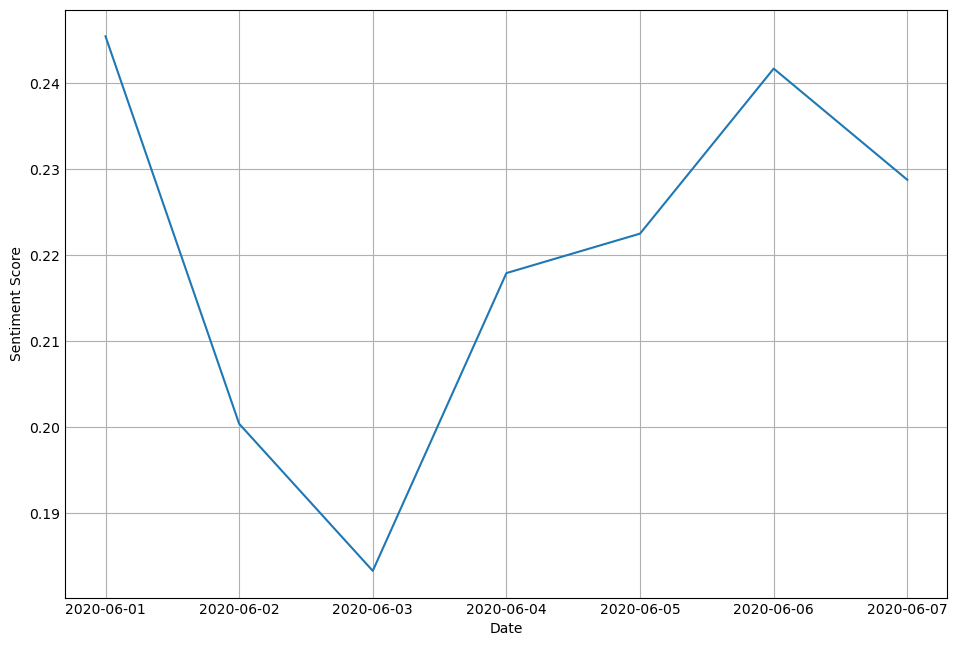

In [134]:
plt.figure(figsize=(9,6))
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.plot(dates, daily_sentiment_average)
plt.show()